# Machine Learning project

### Gruppo 7:
- **Emanuele Conforti (252122)**
- **Jacopo Garofalo (252093)**
- **Gianmarco La Marca (252256)**

## **Heart disease Dataset**

### **Business Understanding**

- **Scenario**
    - CMS compiles claims data for Medicare and Medicaid patients across a variety of categories and years. This includes Inpatient and Outpatient claims, Master Beneficiary Summary Files, and many other files. Indicators from this data source have been computed by personnel in CDC's Division for Heart Disease and Stroke Prevention (DHDSP).
The system is designed to integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated risk factors in the United States. The data are organized by location (national and state) and indicator. The data can be plotted as trends and stratified by sex and race/ethnicity.
- **Goal**
    - Define an automatic procedure for categorizing cardiovascular diseases 

### **Data Understanding**

| Column Name                   	| Description                                                                                                     	| Type                      	|
|-------------------	|------------------------------------------------	|-----------------      	|
| ID               	| Patient’s ID                    	|  Numeric                      	|
| Age               	| Patient’s age                 	|  Numeric             	|    
| Sex                	| Patient’s gender: F or M      	|  Binary                      	|
|      BP        	|        Blood Pressure: HIGH, NORMAL or LOW       	|   Categorical                       	|
|       Cholesterol         	|   Concentration of cholesterol in the blood: NORMAL or HIGH          	|   Binary    	|
|     Na           	|    Concentration of sodium in the blood       |     Numeric                    | 
|     K          	|   Concentration of potassium in the blood        	|   Numeric                       	|
|     Drug          	|      The chosen cure: drugY, drugC, drugX, drugA, drugB            	|      Categorical                    	|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
plt.style.use('ggplot')

df = pd.read_csv('heart_disease_data.csv')
df

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
1,2005,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
2,2007,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Age,65+,C1,T4,MD301,Crude,BOC03,AGE06,59,NaN
3,2008,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Gender,Female,C1,T4,MD301,Crude,BOC02,GEN02,59,NaN
4,2004,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Overall,Overall,C1,T5,MD501,Crude,BOC01,OVR01,59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,2012,CO,Colorado,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,8,"(38.843840757000464, -106.13361092099967)"
42636,2010,MI,Michigan,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Gender,Female,C1,T6,MD601,Crude,BOC02,GEN02,26,"(44.6613195430005, -84.71439026999968)"
42637,2012,ME,Maine,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Race,Hispanic,C1,T6,MD601,Crude,BOC04,RAC04,23,"(45.254228894000505, -68.98503133599962)"
42638,2013,ID,Idaho,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Race,Non-Hispanic White,C1,T6,MD601,Crude,BOC04,RAC01,16,"(43.682630005000476, -114.3637300419997)"


#### **Number of rows and cols**

In [2]:
df.shape

(42640, 29)

#### **Number of elements in the matrix**

In [3]:
df.size

1236560

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        42640 non-null  int64  
 1   LocationAbbr                42640 non-null  object 
 2   LocationDesc                42640 non-null  object 
 3   DataSource                  42640 non-null  object 
 4   PriorityArea1               9360 non-null   object 
 5   PriorityArea2               0 non-null      float64
 6   PriorityArea3               14560 non-null  object 
 7   PriorityArea4               0 non-null      float64
 8   Category                    42640 non-null  object 
 9   Topic                       42640 non-null  object 
 10  Indicator                   42640 non-null  object 
 11  Data_Value_Type             42640 non-null  object 
 12  Data_Value_Unit             42640 non-null  object 
 13  Data_Value                  421

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,42640.0,2008.500000,2.872315,2004.0,2006.00,2008.5,2011.0,2013.0
PriorityArea2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PriorityArea4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,42111.0,14.780896,13.286487,0.4,4.50,10.7,21.6,333.3
Data_Value_Alt,42640.0,14.572709,13.333826,-2.0,4.40,10.4,21.5,333.3
LowConfidenceLimit,42111.0,12.661509,11.453615,0.0,3.80,8.2,19.6,94.2
HighConfidenceLimit,42111.0,17.074028,17.910274,1.1,5.00,12.7,23.4,710.5
LocationID,42640.0,29.538462,16.064317,1.0,16.75,29.5,42.5,59.0


#### **Missing values**

In [6]:
df.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                 33280
PriorityArea2                 42640
PriorityArea3                 28080
PriorityArea4                 42640
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                      529
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit              529
HighConfidenceLimit             529
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

There's some missing value for attributes:
- *PriorityArea1*
- *PriorityArea2*
- *PriorityArea3*
- *PriorityArea4*
- *Data_Value*
- *Data_Value_Footnote_Symbol*
- *Data_Value_Footnote*
- *LowConfidenceLimit*
- *HighConfidenceLimit*
- *GeoLocation*

In [7]:
threshold = 70/100 * df.shape[0]

for x in df.columns:
    if df[x].isna().sum() > threshold:
        df = df[df.columns.difference([x])]

df.shape

(42640, 24)

#### **PriorityArea1, PriorityArea2, PriorityArea4, Data_Value_Footnote_Symbol and Data_Value_Footnote have been deleted because they had more than 70% of missing values**

#### **Removing attributes strongly correlated**

The correlated attributes are:
- **Topic** and **TopicId**
- **Break_out** and **BreakOutId**
- **Break_out_category** and **BreakOutCategoryId**
- **Category** and **CategoryID**
- **Geolocation** and **LocationID**
- **Data_value_type** and **Data_Value_TypeID**
- **Indicator** and **IndicatorID** (we remove both)

In [8]:
df = df[df.columns.difference(['TopicId', 'BreakOutId', 'BreakOutCategoryId', 'CategoryId', 'LocationID', 'Data_Value_TypeID', 'Indicator', 'IndicatorID'])]
df.head()

,Break_Out,Break_Out_Category,Category,DataSource,Data_Value,Data_Value_Alt,Data_Value_Type,Data_Value_Unit,GeoLocation,HighConfidenceLimit,LocationAbbr,LocationDesc,LowConfidenceLimit,PriorityArea3,Topic,Year
0,Other,Race,Cardiovascular Diseases,Medicare,5.2,5.2,Crude,Percent (%),NaN,5.3,US,United States,5.1,NaN,Heart Failure,2006
1,Other,Race,Cardiovascular Diseases,Medicare,5.1,5.1,Crude,Percent (%),NaN,5.2,US,United States,5.1,NaN,Heart Failure,2005
2,65+,Age,Cardiovascular Diseases,Medicare,8.5,8.5,Crude,Percent (%),NaN,8.5,US,United States,8.4,NaN,Coronary Heart Disease,2007
3,Female,Gender,Cardiovascular Diseases,Medicare,5.1,5.1,Crude,Percent (%),NaN,5.1,US,United States,5.1,NaN,Coronary Heart Disease,2008
4,Overall,Overall,Cardiovascular Diseases,Medicare,6.1,6.1,Crude,Percent (%),NaN,6.1,US,United States,6.1,NaN,Heart Failure,2004


**TODO**
#### **Convert wrong attribute types**

Attribute to convert: 
- Sex
- BP
- Cholesterol
- Drug

In [9]:
for attribute in df.columns:
    if df[attribute].dtype == object:
        df[attribute] = df[attribute].astype('category')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Break_Out            42640 non-null  category
 1   Break_Out_Category   42640 non-null  category
 2   Category             42640 non-null  category
 3   DataSource           42640 non-null  category
 4   Data_Value           42111 non-null  float64 
 5   Data_Value_Alt       42640 non-null  float64 
 6   Data_Value_Type      42640 non-null  category
 7   Data_Value_Unit      42640 non-null  category
 8   GeoLocation          41820 non-null  category
 9   HighConfidenceLimit  42111 non-null  float64 
 10  LocationAbbr         42640 non-null  category
 11  LocationDesc         42640 non-null  category
 12  LowConfidenceLimit   42111 non-null  float64 
 13  PriorityArea3        14560 non-null  category
 14  Topic                42640 non-null  category
 15  Year               

**Are there any null values?**

In [10]:
df.isna().sum()

Break_Out                  0
Break_Out_Category         0
Category                   0
DataSource                 0
Data_Value               529
Data_Value_Alt             0
Data_Value_Type            0
Data_Value_Unit            0
GeoLocation              820
HighConfidenceLimit      529
LocationAbbr               0
LocationDesc               0
LowConfidenceLimit       529
PriorityArea3          28080
Topic                      0
Year                       0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

Break_Out              0
Break_Out_Category     0
Category               0
DataSource             0
Data_Value             0
Data_Value_Alt         0
Data_Value_Type        0
Data_Value_Unit        0
GeoLocation            0
HighConfidenceLimit    0
LocationAbbr           0
LocationDesc           0
LowConfidenceLimit     0
PriorityArea3          0
Topic                  0
Year                   0
dtype: int64

**Building histograms**

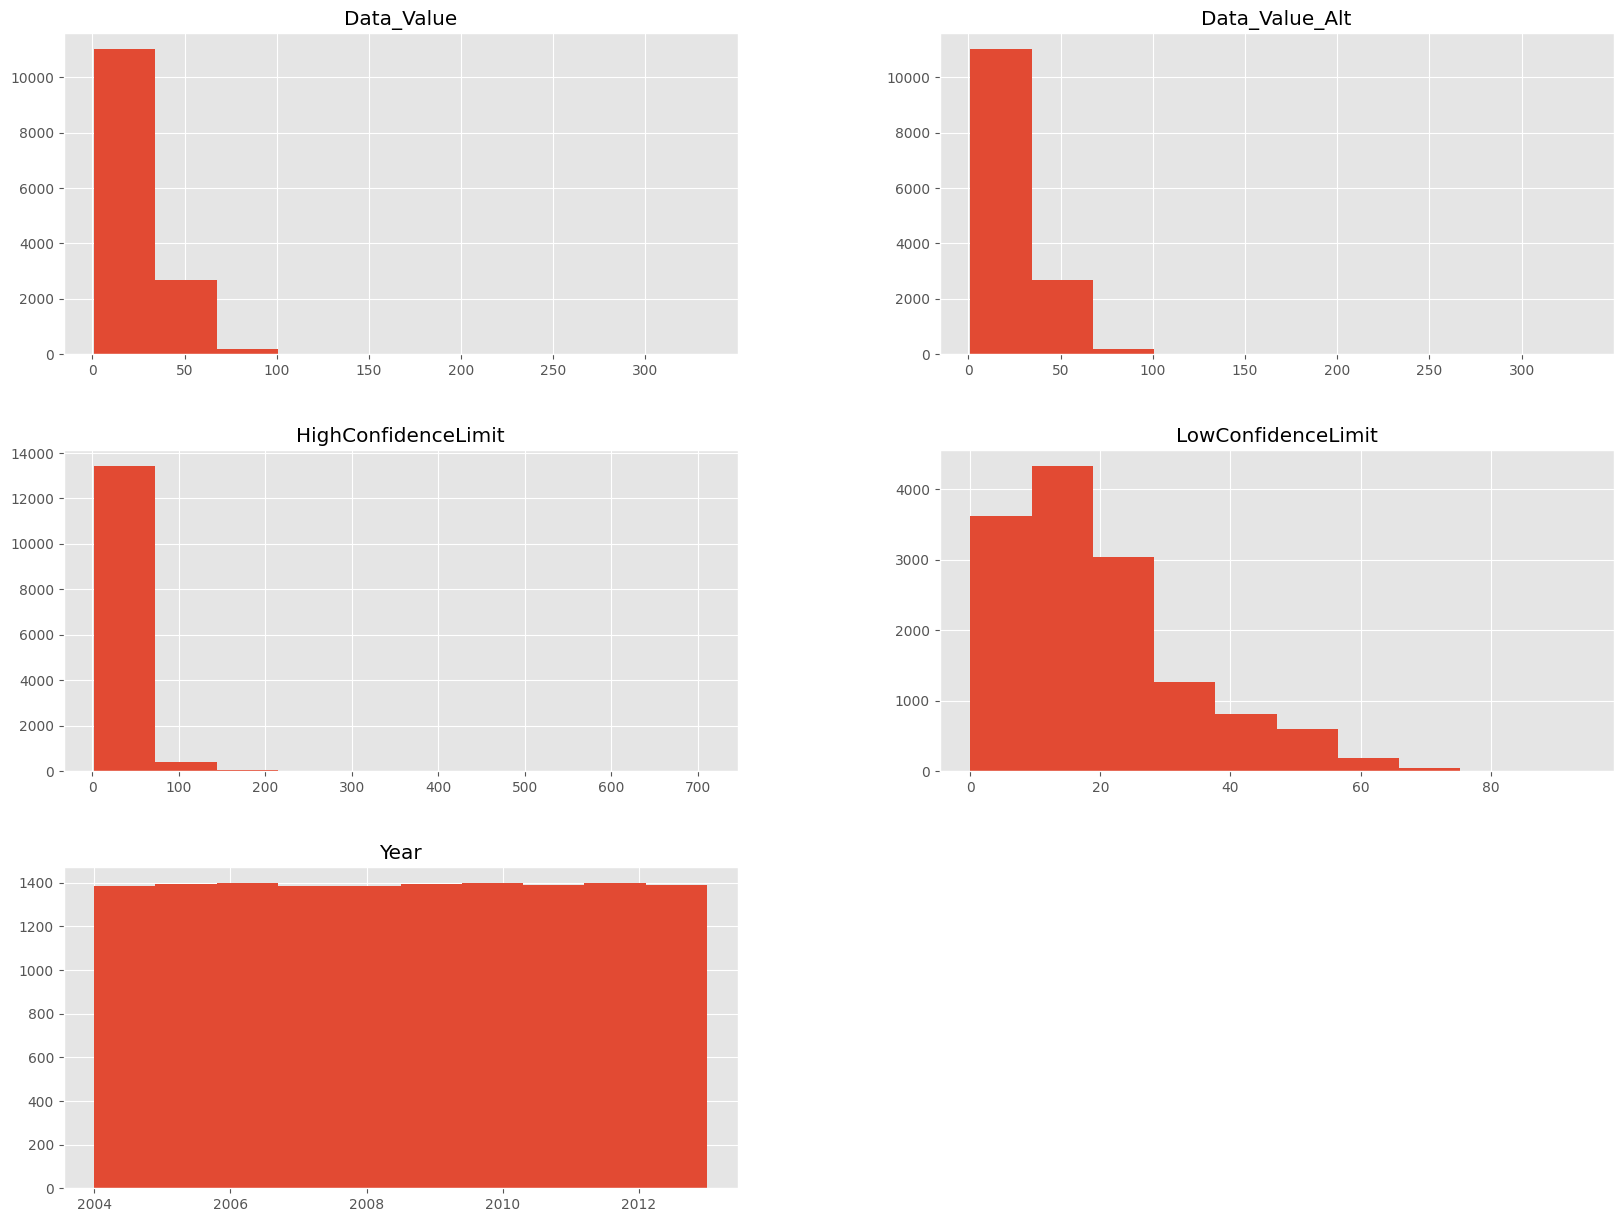

In [13]:
numericDF = df[df.columns.difference(['ID'])]
numericDF.hist(figsize = (20, 15))
plt.show()

##### **Bar plots for categorical attributes**

In [14]:
categoricalAttributes = ['Cholesterol', 'BP', 'Drug']
for attribute in categoricalAttributes:
    val = df[attribute].value_counts()
    val.plot(kind = 'bar', figsize = (5, 5))
    plt.ylabel('count')
    plt.xlabel(attribute)
    plt.show()

KeyError: 'Cholesterol'

#### **Histograms and bar plots according to the class attributes**

In [ ]:
import seaborn as sb

In [ ]:
dfWithoutID = df[df.columns.difference(
    ['ID'])]
attributes =  dfWithoutID.columns.difference(['Drug'])

for attribute in attributes:
    sb.histplot(x = df[attribute], hue = 'Drug', data = dfWithoutID, kde=True)
    plt.show()

In [ ]:
dfWithoutID.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 27), layout=(5, 4))
plt.show()

In [ ]:
sb.pairplot(dfWithoutID, hue = 'Drug')
plt.show()

### **Data Preparation**

##### *Remove all the attributes with too high (typically IDs) or too low variability (column that exhibit the same value for all the records) and all redundat attribute*

In [ ]:
df = df[df.columns.difference(['ID'])]

**Ho deciso di mantenere tutti gli attributi tranne l'ID, perchè sembrano avere tutti distribuzioni eterogenee. E' giusto?**

In [ ]:
df.isna().sum()

**Discretize Na and K attributes**

In [ ]:
df['Na_freq'] = pd.cut(df['Na'].values, bins =(0.4, 0.7, 1), labels = ('Low', 'High'))
df['Na_freq'] = df['Na_freq'].astype('category')
df.drop(columns=['Na'], inplace = True)

In [ ]:
df['K_freq'] = pd.cut(df['K'].values, bins =(0.01, 0.05, 0.09), labels = ('Low', 'High'))
df['K_freq'] = df['K_freq'].astype('category')
df.drop(columns=['K'], inplace = True)

In [ ]:
df.head()

**Binarization of categorical attributes**

In [ ]:
cat_attributes = list(df.select_dtypes(include = ['category']).columns)
cat_attributes.remove('Drug')
df2 = pd.get_dummies(df, columns = cat_attributes)
new_attr_list = list(df2.columns)
new_attr_list.remove('Drug')
df2 = df2[new_attr_list]
df2.head()

In [ ]:
plt.figure(figsize=(15, 7))
sb.heatmap(df2.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()

**Ho stampato l'heatmap solo dopo la binarization e discretization per avere l'heatmap completa (con tutti gli attributi). E' corretto o sarebbe meglio generare l'heatmap prima della Data Preparation, usando solo gli attributi numerici?**

### **Modeling**

#### Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

x = np.array(df2.values)
y = np.array(df['Drug'].values)

seed = 101
test_size = .3
val_size = .2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)

#### Create the models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

In [ ]:
models = []
models.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
                                              random_state=seed)))


# evaluate each model in turn

for name, model in models:
    print(name)
    
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    
    # print('Classification metrics: ')
    # print(classification_report(y_val, y_val_pred))
    print(f'Accuracy: {accuracy_score(y_val, y_val_pred):.2f}')
    print()

### **Evaluation**

#### Predictions on test set

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
models_test = []
models_test.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models_test.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models_test.append(('GaussianNaiveBayes', GaussianNB()))
models_test.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
                                              random_state=seed)))

predictions = []

for name, model in models_test:
    print(name)
    
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    predictions.append(pred)

    print(f'Accuracy: {accuracy_score(y_test, pred):.2f}')
    print()

In [ ]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

In [ ]:
categories = df['Drug'].unique()

for i in range(len(models_test)):
    plt.figure()
    
    make_confusion_matrix(confusion_matrix(y_test, predictions[i]), categories=categories, cmap='binary')
    
    plt.title(f"Confusion Matrix for {models_test[i][0]}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=range(len(categories)), labels=categories)
    plt.yticks(ticks=range(len(categories)), labels=categories)
    plt.show()

##### **Compute the Roc Curve for each class**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['Drug']))

probs = []

for _, model in models:
    model.fit(x_train, y_train)
    probs.append(model.predict_proba(x_test))

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

#### C45 (Decision tree con entropy) e NN sembrano essere gli algoritmi migliori, con accuracy maggiore (0.86) e con ROC curve migliore (area sottostante la curva maggiore)